# Neural Networks Backpropagation

In [6]:
# import the necessary packages
import numpy as np

class NeuralNetwork:
    def __init__(self, layers, alpha=0.1):
        # initialize the list of weights matrices, then store the
        # network architecture and learning rate
        self.W = []
        self.layers = layers
        self.alpha = alpha
        
        # start looping from the index of the first layer but
        # stop before we reach the last two layers
        for i in np.arange(0, len(layers) - 2):
            # randomly initialize a weight matrix connecting the
            # number of nodes in each respective layer together,
            # adding an extra node for the bias
            w = np.random.randn(layers[i] + 1, layers[i + 1] + 1)
            self.W.append(w / np.sqrt(layers[i]))
            
        # the last two layers are a special case where the input
        # connections need a bias term but the output does not
        w = np.random.randn(layers[-2] + 1, layers[-1])
        self.W.append(w / np.sqrt(layers[-2]))
        
    def __repr__(self):
        # construct and return a string that represents the network
        # architecture
        return "NeuralNetwork: {}".format(
        "-".join(str(l) for l in self.layers))
    
    def sigmoid(self, x):
        # compute and return the sigmoid activation value for a given input value
        return 1.0 / (1 + np.exp(-x))
    
    def sigmoid_deriv(self, x):
        # compute the derivative of the sigmoid function ASSUMING
        # that ‘x‘ has already been passed through the ‘sigmoid‘ function
        return x * (1 - x)
    
    def fit(self, X, y, epochs=1000, displayUpdate=100):
        # insert a column of 1’s as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        X = np.c_[X, np.ones((X.shape[0]))]
        
        # loop over the desired number of epochs
        for epoch in np.arange(0, epochs):
            # loop over each individual data point and train our network on it
            for (x, target) in zip(X, y):
                self.fit_partial(x, target)
                
            # check to see if we should display a training update
            if epoch == 0 or (epoch + 1) % displayUpdate == 0:
                loss = self.calculate_loss(X, y)
                print("[INFO] epoch={}, loss={:.7f}".format(epoch + 1, loss))
            
    def fit_partial(self, x, y):
        # construct our list of output activations for each layer
        # as our data point flows through the network; the first
        # activation is a special case -- it’s just the input
        # feature vector itself
        A = [np.atleast_2d(x)]
        
        # FEEDFORWARD:
        # loop over the layers in the network
        for layer in np.arange(0, len(self.W)):
            # feedforward the activation at the current layer by
            # taking the dot product between the activation and
            # the weight matrix -- this is called the "net input"
            # to the current layer
            net = A[layer].dot(self.W[layer])
            
            # computing the "net output" is simply applying our
            # nonlinear activation function to the net input
            out = self.sigmoid(net)
            
            # once we have the net output, add it to our list of activations
            A.append(out)
            
        # BACKPROPAGATION
        # the first phase of backpropagation is to compute the
        # difference between our *prediction* (the final output
        # activation in the activations list) and the true target value
        error = A[-1] - y

        # from here, we need to apply the chain rule and build our
        # list of deltas ‘D‘; the first entry in the deltas is
        # simply the error of the output layer times the derivative
        # of our activation function for the output value
        D = [error * self.sigmoid_deriv(A[-1])]

        # once you understand the chain rule it becomes super easy
        # to implement with a ‘for‘ loop -- simply loop over the
        # layers in reverse order (ignoring the last two since we
        # already have taken them into account)
        for layer in np.arange(len(A) - 2, 0, -1):
            # the delta for the current layer is equal to the delta
            # of the *previous layer* dotted with the weight matrix
            # of the current layer, followed by multiplying the delta
            # by the derivative of the nonlinear activation function
            # for the activations of the current layer
            delta = D[-1].dot(self.W[layer].T)
            delta = delta * self.sigmoid_deriv(A[layer])
            D.append(delta)

        # since we looped over our layers in reverse order we need to
        # reverse the deltas
        D = D[::-1]
        
        # WEIGHT UPDATE PHASE
        # loop over the layers
        for layer in np.arange(0, len(self.W)):
            # update our weights by taking the dot product of the layer
            # activations with their respective deltas, then multiplying
            # this value by some small learning rate and adding to our
            # weight matrix -- this is where the actual "learning" takes place
            self.W[layer] += -self.alpha * A[layer].T.dot(D[layer])

    def predict(self, X, addBias=True):
        # initialize the output prediction as the input features -- this
        # value will be (forward) propagated through the network to
        # obtain the final prediction
        p = np.atleast_2d(X)
        
        # check to see if the bias column should be added
        if addBias:
            # insert a column of 1’s as the last entry in the feature
            # matrix (bias)
            p = np.c_[p, np.ones((p.shape[0]))]
            
        # loop over our layers in the network
        for layer in np.arange(0, len(self.W)):
            # computing the output prediction is as simple as taking
            # the dot product between the current activation value ‘p‘
            # and the weight matrix associated with the current layer,
            # then passing this value through a nonlinear activation function
            p = self.sigmoid(np.dot(p, self.W[layer]))
            
        # return the predicted value
        return p
    
    def calculate_loss(self, X, targets):
        # make predictions for the input data points then compute
        # the loss
        targets = np.atleast_2d(targets)
        predictions = self.predict(X, addBias=False)
        loss = 0.5 * np.sum((predictions - targets) ** 2)
        
        # return the loss
        return loss

In [7]:
# import the necessary packages
import numpy as np

# construct the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# define our 2-2-1 neural network and train it
nn = NeuralNetwork([2, 2, 1], alpha=0.5)
nn.fit(X, y, epochs=1000)

# now that our network is trained, loop over the XOR data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = nn.predict(x)[0][0]
    step = 1 if pred > 0.5 else 0
    print("[INFO] data={}, ground-truth={}, pred={:.4f}, step={}".format(x, target[0], pred, step))

[INFO] epoch=1, loss=0.5000987
[INFO] epoch=100, loss=0.4999805
[INFO] epoch=200, loss=0.5000296
[INFO] epoch=300, loss=0.5000728
[INFO] epoch=400, loss=0.5000572
[INFO] epoch=500, loss=0.4999096
[INFO] epoch=600, loss=0.4994069
[INFO] epoch=700, loss=0.4974850
[INFO] epoch=800, loss=0.4889236
[INFO] epoch=900, loss=0.4608457
[INFO] epoch=1000, loss=0.4099921
[INFO] data=[0 0], ground-truth=0, pred=0.3100, step=0
[INFO] data=[0 1], ground-truth=1, pred=0.5618, step=1
[INFO] data=[1 0], ground-truth=1, pred=0.5523, step=1
[INFO] data=[1 1], ground-truth=0, pred=0.5757, step=1


# MNIST

In [10]:
# construct the training and testing splits
(trainX, testX, trainY, testY) = train_test_split(data, digits.target, test_size=0.25)

# convert the labels from integers to vectors
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

In [11]:
# train the network
print("[INFO] training network...")
nn = NeuralNetwork([trainX.shape[1], 32, 16, 10])
print("[INFO] {}".format(nn))
nn.fit(trainX, trainY, epochs=1000)

[INFO] training network...
[INFO] NeuralNetwork: 64-32-16-10
[INFO] epoch=1, loss=605.3734882
[INFO] epoch=100, loss=8.1470014
[INFO] epoch=200, loss=3.1723191
[INFO] epoch=300, loss=2.5658882
[INFO] epoch=400, loss=2.3539419
[INFO] epoch=500, loss=1.8358798
[INFO] epoch=600, loss=1.7410846
[INFO] epoch=700, loss=1.6906195
[INFO] epoch=800, loss=1.6578468
[INFO] epoch=900, loss=1.6346194
[INFO] epoch=1000, loss=1.6172436


In [12]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = nn.predict(testX)
predictions = predictions.argmax(axis=1)
print(classification_report(testY.argmax(axis=1), predictions))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.98      0.98      0.98        48
           2       0.98      1.00      0.99        44
           3       0.98      0.98      0.98        54
           4       1.00      0.97      0.98        33
           5       0.98      0.98      0.98        41
           6       1.00      1.00      1.00        57
           7       0.96      0.98      0.97        47
           8       0.97      0.95      0.96        39
           9       0.96      0.96      0.96        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



# Neural Networks with Keras

In [13]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.
/home/pedro/anaconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pedro/anaconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pedro/anaconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [14]:
# grab the MNIST dataset (if this is your first time running this
# script, the download may take a minute -- the 55MB MNIST dataset
# will be downloaded)
print("[INFO] loading MNIST (full) dataset...")
dataset = datasets.fetch_mldata("MNIST Original")
# scale the raw pixel intensities to the range [0, 1.0], then
# construct the training and testing splits
data = dataset.data.astype("float") / 255.0
(trainX, testX, trainY, testY) = train_test_split(data, dataset.target, test_size=0.25)

[INFO] loading MNIST (full) dataset...


/home/pedro/anaconda3/envs/computer-vision/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/home/pedro/anaconda3/envs/computer-vision/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [15]:
# convert the labels from integers to vectors
labelBinarizer = LabelBinarizer()
trainY = labelBinarizer.fit_transform(trainY)
testY = labelBinarizer.transform(testY)

In [16]:
# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [17]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=128)

[INFO] training network...
Train on 52500 samples, validate on 17500 samples
Epoch 1/100
52500/52500 [==============================] - 8s 143us/step - loss: 2.2821 - acc: 0.1968 - val_loss: 2.2466 - val_acc: 0.2454
Epoch 2/100
52500/52500 [==============================] - 1s 12us/step - loss: 2.2178 - acc: 0.3890 - val_loss: 2.1848 - val_acc: 0.4147
Epoch 3/100
52500/52500 [==============================] - 1s 12us/step - loss: 2.1485 - acc: 0.5263 - val_loss: 2.1063 - val_acc: 0.4711
Epoch 4/100
52500/52500 [==============================] - 1s 12us/step - loss: 2.0547 - acc: 0.5953 - val_loss: 1.9961 - val_acc: 0.6763
Epoch 5/100
52500/52500 [==============================] - 1s 13us/step - loss: 1.9245 - acc: 0.6490 - val_loss: 1.8427 - val_acc: 0.6594
Epoch 6/100
52500/52500 [==============================] - 1s 12us/step - loss: 1.7535 - acc: 0.6757 - val_loss: 1.6542 - val_acc: 0.6966
Epoch 7/100
52500/52500 [==============================] - 1s 12us/step - loss: 1.5557 - acc: 

In [18]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), 
                            target_names=[str(x) for x in labelBinarizer.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      1717
         1.0       0.95      0.97      0.96      1999
         2.0       0.93      0.88      0.90      1753
         3.0       0.91      0.88      0.89      1819
         4.0       0.93      0.93      0.93      1762
         5.0       0.87      0.88      0.88      1530
         6.0       0.94      0.95      0.95      1691
         7.0       0.93      0.94      0.94      1815
         8.0       0.88      0.88      0.88      1660
         9.0       0.90      0.90      0.90      1754

    accuracy                           0.92     17500
   macro avg       0.92      0.92      0.92     17500
weighted avg       0.92      0.92      0.92     17500



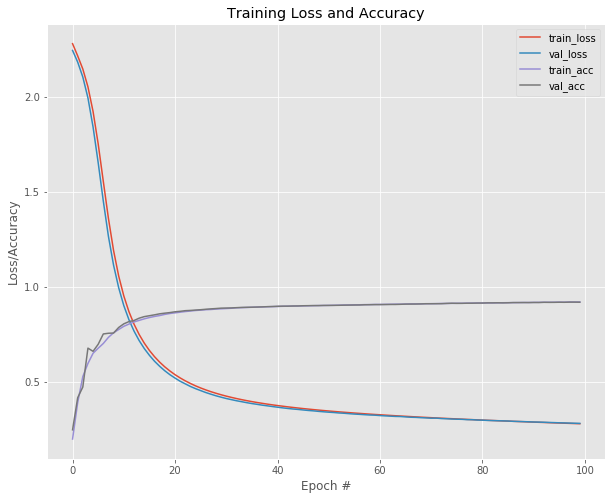

In [19]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

# CIFAR-10

In [20]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

[INFO] loading CIFAR-10 data...


In [22]:
# convert the labels from integers to vectors
labelBinarizer = LabelBinarizer()
trainY = labelBinarizer.fit_transform(trainY)
testY = labelBinarizer.transform(testY)

# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [23]:
# define the 3072-1024-512-10 architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [24]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 93us/step - loss: 1.8345 - acc: 0.3460 - val_loss: 1.7211 - val_acc: 0.3818
Epoch 2/100
50000/50000 [==============================] - 5s 90us/step - loss: 1.6485 - acc: 0.4184 - val_loss: 1.6315 - val_acc: 0.4300
Epoch 3/100
50000/50000 [==============================] - 4s 88us/step - loss: 1.5678 - acc: 0.4446 - val_loss: 1.5487 - val_acc: 0.4539
Epoch 4/100
50000/50000 [==============================] - 4s 89us/step - loss: 1.5100 - acc: 0.4684 - val_loss: 1.6305 - val_acc: 0.4348
Epoch 5/100
50000/50000 [==============================] - 4s 88us/step - loss: 1.4643 - acc: 0.4827 - val_loss: 1.4818 - val_acc: 0.4743
Epoch 6/100
50000/50000 [==============================] - 4s 89us/step - loss: 1.4229 - acc: 0.4986 - val_loss: 1.4839 - val_acc: 0.4663
Epoch 7/100
50000/50000 [==============================] - 5s 92us/step - loss: 1.3884 - acc: 0

In [25]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.63      0.68      0.65      1000
  automobile       0.70      0.65      0.68      1000
        bird       0.49      0.41      0.45      1000
         cat       0.39      0.42      0.40      1000
        deer       0.51      0.51      0.51      1000
         dog       0.48      0.51      0.49      1000
        frog       0.62      0.65      0.63      1000
       horse       0.62      0.63      0.63      1000
        ship       0.71      0.69      0.70      1000
       truck       0.63      0.60      0.62      1000

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.58     10000
weighted avg       0.58      0.58      0.58     10000



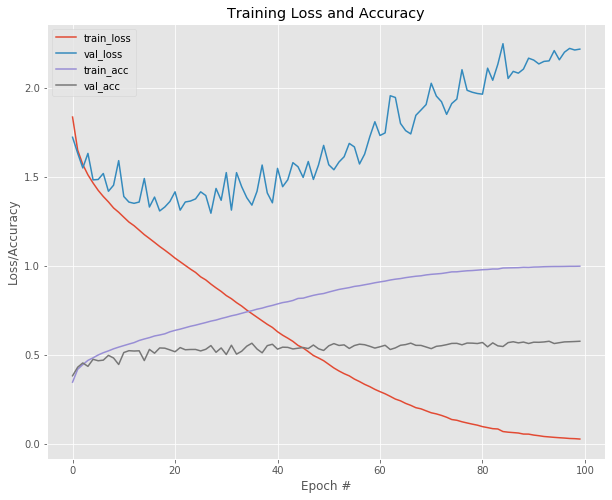

In [26]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()